In [51]:
import networkx as nx
import pickle
import numpy as np
import pandas as pd
from scipy import stats, integrate
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(color_codes=True)
m = pickle.load( open("bool_matrix.p", "rb"))
exc = pickle.load( open("graph_excit.p", "rb"))
inh = pickle.load( open("graph_inhib.p", "rb"))

assert np.sum(inh) > np.sum(exc)
for i in inh:
#    if 
#    print(i.asInt())
#print([float(i) for i in inh])


AttributeError: 'numpy.ndarray' object has no attribute 'asInt'

/opt/conda/lib/python3.5/site-packages/matplotlib/legend.py:634: UserWarning: Unrecognized location "top right". Falling back on "best"; valid locations are
	best
	upper center
	center left
	lower right
	upper left
	lower left
	right
	center right
	upper right
	center
	lower center

  % (loc, '\n\t'.join(self.codes)))


/opt/conda/lib/python3.5/site-packages/matplotlib/font_manager.py:1320: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


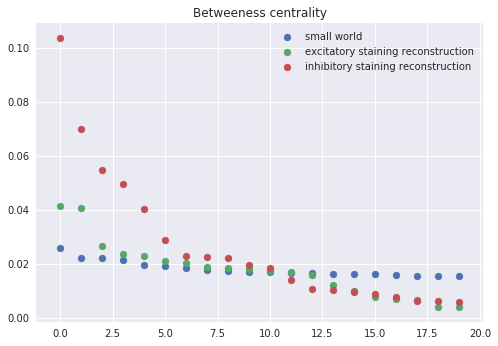

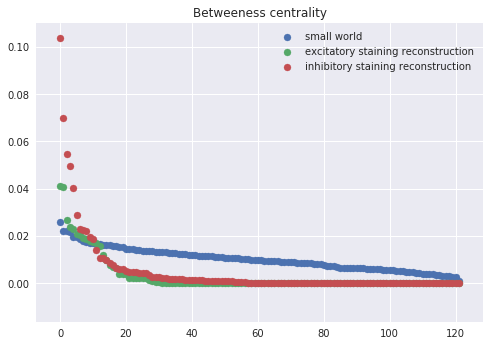

In [45]:
G = nx.DiGraph(exc)
Gi = nx.DiGraph(inh)

in_degree = G.in_degree()
top_in = sorted(([ (v,k) for k, v in in_degree.items() ]))
in_hub = top_in[-1][1]
out_degree = G.out_degree()
top_out = sorted(([ (v,k) for k, v in out_degree.items() ]))
out_hub = top_out[-1][1]
mean_out = np.mean(list(out_degree.values()))
mean_in = np.mean(list(in_degree.values()))

mean_conns = int(mean_in + mean_out/2)

k = 2 # number of neighbouig nodes to wire.
p = 0.25 # probability of instead wiring to a random long range destination.
ne = len(exc)# size of small world network
small_world_ring_excit = nx.watts_strogatz_graph(ne,mean_conns,0.25)


#k = 2 # number of neighbouring nodes to wire.
#p = 0.25 # probability of instead wiring to a random long range destination.
#ni = len(inh)# size of small world network
#small_world_ring_inhib   = nx.watts_strogatz_graph(ni,mean_conns,0.25)


sw = nx.betweenness_centrality(small_world_ring_inhib)
sexc = nx.betweenness_centrality(G)
sinh = nx.betweenness_centrality(Gi)

stop_w = sorted(([ (v,k) for k, v in dict(sw).items() ]), reverse=True)
stop_exc = sorted(([ (v,k) for k, v in dict(sexc).items() ]), reverse=True)
stop_inh = sorted(([ (v,k) for k, v in dict(sinh).items() ]), reverse=True)

degree_w = [ f[0] for f in stop_w ]
degree_i = [ f[0] for f in stop_inh ]


axis_callw = [ i for i in range(0,len(degree_w)) ]
degree_t = [ f[0] for f in stop_exc ]
axis_callt = [ i for i in range(0,len(degree_t)) ]
plt.figure()
plt.title('Betweeness centrality')
plt.scatter(axis_callr[0:20],degree_w[0:20],label='small world');
plt.scatter(axis_callt[0:20],degree_t[0:20],label='excitatory staining reconstruction');
plt.scatter(axis_callt[0:20],degree_i[0:20],label='inhibitory staining reconstruction');

plt.legend(loc="top right")

plt.figure()
plt.title('Betweeness centrality')
plt.scatter(axis_callr,degree_w,label='small world');
plt.scatter(axis_callt,degree_t,label='excitatory staining reconstruction');
plt.scatter(axis_callt,degree_i,label='inhibitory staining reconstruction');

plt.legend(loc="top right")

In [36]:

Gexc = nx.DiGraph(exc)
Ginh = nx.DiGraph(inh)
m = nx.DiGraph(m)

receivers = m.in_degree()
transmitters = m.out_degree()

top_r = sorted(([ (v,k) for k, v in dict(receivers).items() ]), reverse=True)
top_t = sorted(([ (v,k) for k, v in dict(transmitters).items() ]), reverse=True)
#print(top_r)
ginh = nx.betweenness_centrality(Ginh)
gexc = nx.betweenness_centrality(Gexc)
top_inh = sorted(([ (v,k) for k, v in dict(ginh).items() ]), reverse=True)
top_exc = sorted(([ (v,k) for k, v in dict(gexc).items() ]), reverse=True)

/opt/conda/lib/python3.5/site-packages/matplotlib/legend.py:634: UserWarning: Unrecognized location "top right". Falling back on "best"; valid locations are
	best
	upper center
	center left
	lower right
	upper left
	lower left
	right
	center right
	upper right
	center
	lower center

  % (loc, '\n\t'.join(self.codes)))


/opt/conda/lib/python3.5/site-packages/matplotlib/font_manager.py:1320: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


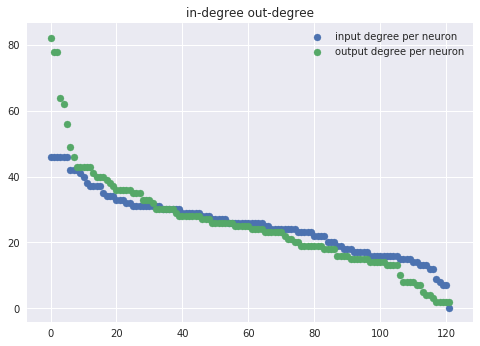

In [39]:
degree_rec = [ f[0] for f in top_r ]
axis_callr = [ i for i in range(0,len(degree_rec)) ]
degree_t = [ f[0] for f in top_t ]
axis_callt = [ i for i in range(0,len(degree_t)) ]
plt.title('in-degree out-degree')
plt.scatter(axis_callr,degree_rec,label='input degree per neuron');
plt.scatter(axis_callt,degree_t,label='output degree per neuron');
plt.legend(loc="top right")

In [3]:
top10e = top_exc[0:int(len(top_exc)/10)]
top50e = top_exc[0:int(len(top_exc)/2)]
top10i = top_inh[0:int(len(top_inh)/10)]
top50i = top_inh[0:int(len(top_inh)/2)]

In [4]:
degree_c10e = [ f[0] for f in top10e ]
axis_c10e = [ i for i in range(0,len(degree_c10e)) ]
degree_c50e = [ f[0] for f in top50e ]
axis_c50e = [ i for i in range(0,len(degree_c50e)) ]
degree_c10i = [ f[0] for f in top10i ]
axis_c10i = [ i for i in range(0,len(degree_c10i)) ]
degree_c50i = [ f[0] for f in top50i ]
axis_c50i = [ i for i in range(0,len(degree_c50i)) ]

/opt/conda/lib/python3.5/site-packages/matplotlib/font_manager.py:1320: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


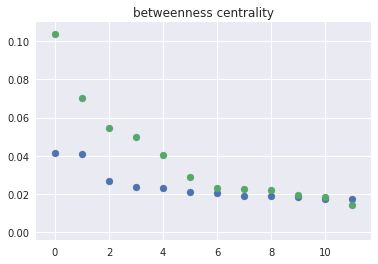

In [5]:

plt.clf()
plt.title('betweenness centrality')
plt.scatter(axis_c10e,degree_c10e,label='excitatory syn');
plt.scatter(axis_c10i,degree_c10i,label='inhibitory syn');
plt.show()

/opt/conda/lib/python3.5/site-packages/matplotlib/legend.py:634: UserWarning: Unrecognized location "top right". Falling back on "best"; valid locations are
	best
	upper center
	center left
	lower right
	upper left
	lower left
	right
	center right
	upper right
	center
	lower center

  % (loc, '\n\t'.join(self.codes)))
/opt/conda/lib/python3.5/site-packages/matplotlib/font_manager.py:1320: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


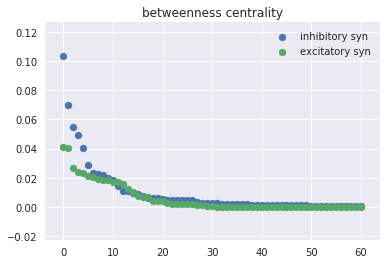

In [6]:

plt.clf()
plt.title('betweenness centrality')
plt.scatter(axis_c50i,degree_c50i,label='inhibitory syn');
plt.scatter(axis_c50e,degree_c50e,label='excitatory syn');
plt.legend(loc="top right")
plt.show()


/opt/conda/lib/python3.5/site-packages/matplotlib/legend.py:634: UserWarning: Unrecognized location "top right". Falling back on "best"; valid locations are
	best
	upper center
	center left
	lower right
	upper left
	lower left
	right
	center right
	upper right
	center
	lower center

  % (loc, '\n\t'.join(self.codes)))


/opt/conda/lib/python3.5/site-packages/matplotlib/font_manager.py:1320: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


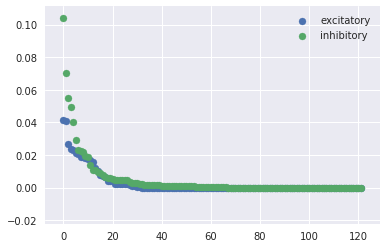

In [7]:
degree_calle = [ f[0] for f in top_exc ]
axis_calle = [ i for i in range(0,len(top_exc)) ]
degree_calli = [ f[0] for f in top_inh ]
axis_calli = [ i for i in range(0,len(top_inh)) ]
plt.scatter(axis_calle,degree_calle,label='excitatory');
plt.scatter(axis_calli,degree_calli,label='inhibitory');
plt.legend(loc="top right")